In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import pgeocode
import folium
from folium.plugins import HeatMap
pd.options.mode.chained_assignment = None  # default='warn'

In [30]:
# dataset = pd.read_csv("../processed_data/phase2_final_clean.csv")
dataset = pd.read_csv("../processed_data/Final_Master_Clean.csv")
dataset = dataset.iloc[:,1:]
dataset.head()

,inst_type,detained_sentenced,sentence_len,current_custody_start,current_crime,age,date_first_adult_incarc,zipcode,address,state,city,race_ethnicity,race/ethn_other,gender,gender_other,trans_y/n,sexuality,sexuality_other,lost_housing_y/n,housing_explanation,military_y/n,military_explanation,childhood_fun,childhood_goodat,num_trusted_adults,gang_y/n,gang_explanation,gang_wronglyaccused_y/n,famfriends_gang_y/n,trusted_adults,trusted_adults_other,clubs/sports_inscool,clubs/sports,two_parents_at_home,22_yes_divorced/separate,22_no_explain,lived_with_mental_unstable,lived_with_alcoholic,lived_with_drug_addict,live_with_servedtime_sentenced,adult_physically_hurt_you,adult_physically_hurt_eachother,removed_from_home,29_age,29_reason,29_times_reoved_from_home,29_how_long,29_abused_in_foster,29_neglected_in_foster,29_residential_programs,29_times_residential_programs,arrested_charged_atschool,30_yes_explain,attend_college_univeristy,31_yes_graduate,academic_achievement,on_IEP,33_service_received,33_other_service_received,33_disability,have_504_plan,504_expla,504_improv_plan,504_service_satisfied,504ss_yes,504ss_no,learning_dissability_inschool,ldi_disability,emotional_dissability,mentalHealth_condition,mhcbi_condition,counseling_beforeIncarceration,therapist_same_race/ethnicity,medication_beforeIncarceration,difficulty_gettingHelp,hospitalized_due2mental,times_hospitalized4mentalHealth,positive_experience_withPolice,posExp_expla,negative_experience,negExp_expla,arrested_under18,what4,times_arrested,youthCorrectionalFacility_otherState,detained_preTrial,overnightTill_courtDay,committed,juvenile_diversion,diversion_terms,complete_diversion,Juvenile_Probation,School_Continue,Age_DYS,Lawyer_Relationship,Lawyer_Rela_Explanation,Juvenile_Conviction,Juvenile_Conviction_Explanation,Fair_Treated,Fair_Treated_Explanation,Experience_First_Incarceration,Elementary_School_Num,Middle_School_Num,High_School_Num,Elementary_School_Skip,Middle_School_Skip,High_School_Skip,Elementary_School_Kicked,Middle_School_Kicked,High_School_Kicked,Elementary_School_HomeSent,Middle_School_HomeSent,High_School_HomeSent,Elementary_School_Suspended,Middle_School_Suspended,High_School_Suspended,Elementary_School_Expelled,Middle_School_Expelled,High_School_Expelled,Elementary_School_Suspended_Where,Middle_School_Suspended_Where,High_School_Suspended_Where,Suspended_Reason,Schools_Attended,School_Experience,Survey_Reaction
0,County Jail,Detained,Not Answered,2020-09-30,awaiting trial for probation violation,38,26,Not answered,and,Not Answered,Not Answered,White,Not Answered,Female,Not Answered,No,Straight (Heterosexual),Not Answered,0.0,Not Answered,0.0,Not Answered,"movies, reading, writing, hanging with friends","school, making friends, making people laugh","grandparents, mom and dad even though addicts,...",0.0,Not Answered,No,No,"Parent,Other Family Member,Other:","Brothers, aunts and uncles, mom and dad",Yes,ice hockey and soccer,"Yes,If no please explain:",Yes,dad died at 15 years old,Yes,Yes,Yes,Yes,Never,Never,Yes,7 years old,Neglect,lost count,A month,Yes - emotionally,Yes,Yes,residential,No,Not Answered,Yes,No,entrepreneur at Northeastern University,No - I was never on an IEP in school,Not Answered,Not Answered,Not Answered,No,Not Answered,Not Answered,No - Explain:,Not Answered,Not Answered,No,Not Answered,Yes,Yes,"circled depression, anxiety, PTSD, or a mood o...",Yes,Yes,Yes,Very Often,Yes - for a few days,10 times or more,1.0,Not Answered,0.0,Not Answered,Yes,underage drinking,Not Answered,No,No,No,Not Answered,No,Not Answered,Not Answered,No,No,Not Answered,Please explain:,Never,No,Not Answered,"No,Explain:",Because my crimes are due to my drug addiction,I was clean on Vivitrol and up until a few day...,one,one,two,a few times,a few times,a few times,once,never,often,never,never,a few times,never,never,a few times,no,no,yes,Not Answered,Not Answered,out-of-school,fighting girls and being mean,"St. Margarets elementary and middle, Monsignor...","No, I was a 

In [31]:
# Clean the data for Question 1
########################################################################################
unique_gender_val = np.array(dataset["gender"].unique())
# Expected to have 3 values: Female, Male, or from Prefer to self-describe
# print(unique_gender_val)
# print("Length of gender:", len(unique_gender_val))


# Replace the incorrect Input reading from CSV 
# for val in dataset["9"]:
#     if (val == "Female, Prefer to self-describe:"):
dataset["gender"].replace(to_replace="Female, Prefer to self-describe:", 
                                    value="Female", 
                                    inplace=True)

dataset["gender"].replace(to_replace=["Prefer to self-describe:", "Prefer to Self Describe:"], 
                                    value="Self-described", 
                                    inplace=True)

# print()
# unique_gender_val_update = np.array(dataset["gender"].unique())
# Expected to have 4 values: Female, Male, Prefer to self-describe, or Not Answered
# print(unique_gender_val_update)
# print("Length of gender:", len(unique_gender_val_update))

# print()
# print()

########################################################################################
# Clean the race
# unique_race_val = np.array(dataset["race_ethnicity"].unique())
# print(unique_race_val)
# print("Length of race:", len(unique_race_val))


# Replace the incorrect input reading from CSV

dataset["race_ethnicity"].replace(to_replace=["Latinx, Prefer to self-describe:", 
                                                "Latinx,Prefer to self describe"], 
                                    value="Latinx", 
                                    inplace=True)

dataset["race_ethnicity"].replace(to_replace=["Black/African American,Prefer to self describe"], 
                                    value="Black/African American", 
                                    inplace=True)

dataset["race_ethnicity"].replace(to_replace=["Black/African American, Latinx",
                                "White, Native Hawaiian/Pacific Islander",
                                "White, Latinx",
                                "White, Multi-Race",
                                "Black/African American, White",
                                "Black/African American, Multi-Race",
                                "White, Native American",
                                "Black/African American, White, Multi-Race",
                                "Black/African American,White,Latinx", 
                                "Black/African American,Latinx",
                                "Black/African American,White,Native American",
                                "White,Multi-Race,Latinx",
                                "Black/African American,White,Multi-Race",
                                "Black/African American,Native American",
                                "Multi-Race,Latinx",
                                "Multi-Race,Prefer to self describe",
                                "Asian,White",
                                "Black/African American,Multi-Race,Latinx,Prefer to self describe",
                                "Black/African American,White",
                                "White,Latinx",
                                "Black/African American,Multi-Race,Latinx",
                                "White,Latinx,Prefer to self describe",
                                "Black/African American,Multi-Race",
                                "Middle Eastern/North African",
                                "White,Native American"], 
                                value='Multi-Race', 
                                inplace=True)

dataset["race_ethnicity"].replace(to_replace=["Prefer to self-describe:", 
                                                "Prefer to self describe"], 
                                    value="Self-described", 
                                    inplace=True)


# print()
unique_race_val_update = np.array(dataset["race_ethnicity"].unique())
print(unique_race_val_update)
print("Length of gender:", len(unique_race_val_update))


# print()
# print()

########################################################################################
# Clean the sexual orientation
unique_sexual_orient_val = np.array(dataset["sexuality"].unique())
# print(unique_sexual_orient_val)
# print("Length of sexual orient:", len(unique_sexual_orient_val))


# Replace the incorrect input reading from CSV 
dataset["sexuality"].replace(to_replace="Straight (Heterosexual),Prefer to self-describe",
                                        value="Straight (Heterosexual)", 
                                        inplace=True)

dataset["sexuality"].replace(to_replace=["Bisexual, Prefer to self-describe:", 
                                            "Bisexual,Prefer to self-describe",
                                            "Straight (Heterosexual),Bisexual", 
                                            "Straight (Heterosexual),Bisexual"],
                                        value="Bisexual", 
                                        inplace=True)

dataset["sexuality"].replace(to_replace=["Prefer to self-describe:", 
                                            "Prefer to self-describe"], 
                                    value="Self-described", 
                                    inplace=True)

dataset["sexuality"].replace(to_replace="Asexual,Prefer to self-describe",
                                        value="Asexual", 
                                        inplace=True)


dataset["sexuality"].replace(to_replace=["Lesbian,Gay"],
                                        value="Lesbian", 
                                        inplace=True)

dataset["sexuality"].replace(to_replace=["Gay,Prefer to self-describe"],
                                        value="Gay", 
                                        inplace=True)
print()
unique_sexual_orient_val_update = np.array(dataset["sexuality"].unique())
# Expected to have 7 values like in the pdf, and Not Answered for blank vals
# print(unique_sexual_orient_val_update)
# print("Length of sexual orientation:", len(unique_sexual_orient_val_update))

# Clean the data for Question 3
########################################################################################
unique_IEP_val = np.array(dataset["on_IEP"].unique())
# print(unique_IEP_val)
# print("Length of gender:", len(unique_IEP_val))

dataset["on_IEP"].replace(to_replace=["No -  I was never on an IEP in school",
                                        "No - I was never on an IEP in school"],
                                        value="No",
                                        inplace=True)

dataset["on_IEP"].replace(to_replace=["Yes,No - I was never on an IEP in school"],
                                        value="Yes",
                                        inplace=True)

# Replace the incorrect input reading from CSV 
# dataset["on_IEP"].fillna("Not Answered", inplace=True)

# print()

# unique_IEP_val_update = np.array(dataset["on_IEP"].unique())
# print(unique_IEP_val_update)
# print("Length of IEP:", len(unique_IEP_val_update))

# Clean the data 
########################################################################################
arrested_under_18 = np.array(dataset["arrested_under18"].unique())
print(arrested_under_18)

dataset["arrested_under18"].replace(to_replace=["Yes,No", "Yes, No", "yes,no", "yes, no"],
                                    value="Yes",
                                    inplace=True)

removed_from_home = np.array(dataset["removed_from_home"].unique())
print(removed_from_home)

dataset["removed_from_home"].replace(to_replace=["Yes,No", "Yes, No", "yes,no", "yes, no"],
                                    value="Yes",
                                    inplace=True)


['White' 'Latinx' 'Multi-Race' 'Black/African American' 'Native American'
 'Self-described' 'Asian' 'Not Answered']
Length of gender: 8

['Yes' 'No' 'Not Answered' 'Yes,No']
['Yes' 'No' 'Not Answered' 'Yes,No']


**Question 1**

What percentage of survey respondents answered **YES** to "arrested before age 18" separated by race, gender, and sexual orientation?

Gender

Percentage of Male answered YES to arrested before 18 is 33.18681318681318 %
Percentage of Female answered YES to arrested before 18 is 14.065934065934066 %
Percentage of Not Answered answered YES to arrested before 18 is 0.8791208791208791 %
Percentage of Self-described answered YES to arrested before 18 is 0.8791208791208791 %


Text(0.5, 1.0, 'Percentage of respondents Arrested before 18 chart group by Gender')

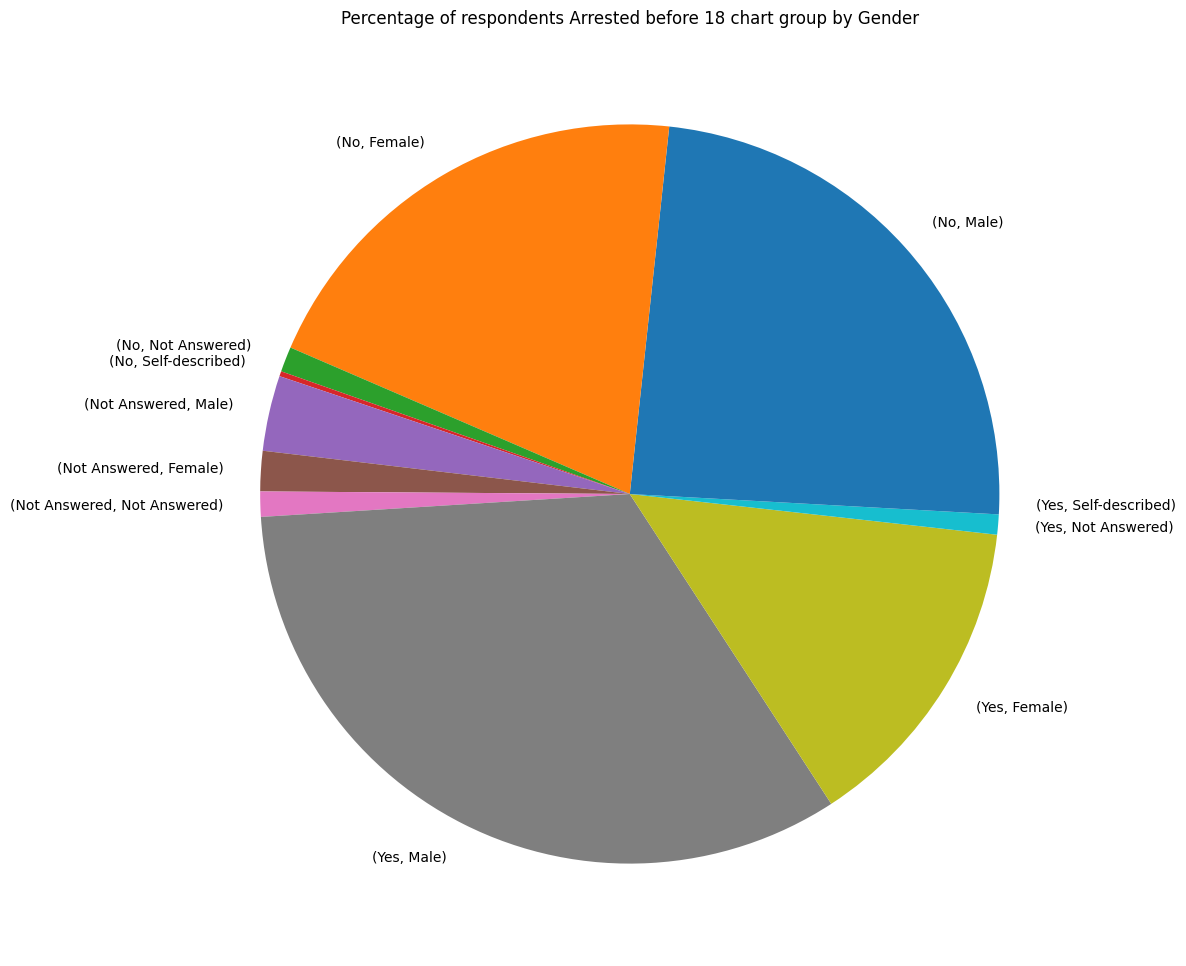

In [32]:
# Gender from column 9
arrested_categorized_by_gender = dataset.groupby("arrested_under18")["gender"].value_counts()

# Calculate the percentage
for (gender, number) in arrested_categorized_by_gender["Yes"].iteritems():
    gender_percentage = (number / arrested_categorized_by_gender.sum()) * 100
    answer = f"Percentage of {gender} answered YES to arrested before 18 is {gender_percentage} %"
    print(answer)

# Plot the bar chart for the total number responsdant
fig, ax = plt.subplots(figsize = (12,12))
arrested_categorized_by_gender.plot(kind="pie")
plt.xticks(rotation=80)
plt.ylabel("")
plt.xlabel("")
plt.title("Percentage of respondents Arrested before 18 chart group by Gender")

Race

Percentage of White answered YES to arrested before 18 is 16.483516483516482 %
Percentage of Black/African American answered YES to arrested before 18 is 14.065934065934066 %
Percentage of Multi-Race answered YES to arrested before 18 is 7.252747252747254 %
Percentage of Latinx answered YES to arrested before 18 is 4.615384615384616 %
Percentage of Self-described answered YES to arrested before 18 is 4.395604395604396 %
Percentage of Not Answered answered YES to arrested before 18 is 1.7582417582417582 %
Percentage of Native American answered YES to arrested before 18 is 0.43956043956043955 %


Text(0.5, 1.0, 'Percentage of respondents Arrested before 18 chart group by Race')

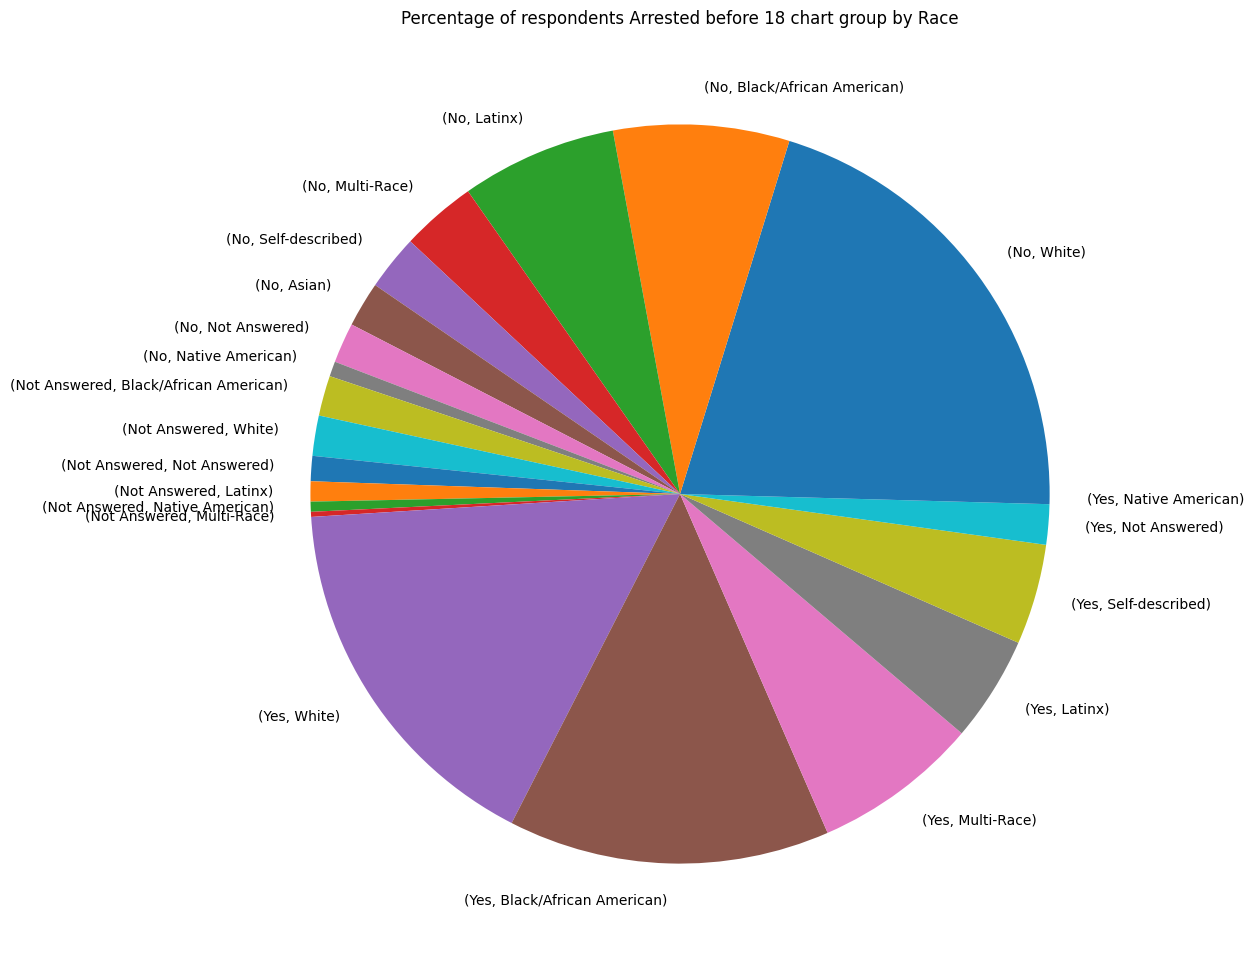

In [33]:
# Race from column 8
arrested_categorized_by_race = dataset.groupby("arrested_under18")["race_ethnicity"].value_counts()

# Calculate the percentage
for (race, number) in arrested_categorized_by_race["Yes"].iteritems():
    race_percentage = (number / arrested_categorized_by_race.sum()) * 100
    answer = f"Percentage of {race} answered YES to arrested before 18 is {race_percentage} %"
    print(answer)

# Plot the bar chart for the total number responsdant
fig, ax = plt.subplots(figsize = (12,12))
arrested_categorized_by_race.plot(kind="pie")
plt.xticks(rotation=80)
plt.ylabel("")
plt.xlabel("")
plt.title("Percentage of respondents Arrested before 18 chart group by Race")

Sexual Orientation

Percentage of Straight (Heterosexual) answer YES to arrested before 18 is 36.7032967032967 %
Percentage of Bisexual answer YES to arrested before 18 is 7.472527472527473 %
Percentage of Lesbian answer YES to arrested before 18 is 1.5384615384615385 %
Percentage of Not Answered answer YES to arrested before 18 is 1.098901098901099 %
Percentage of Self-described answer YES to arrested before 18 is 1.098901098901099 %
Percentage of Gay answer YES to arrested before 18 is 0.6593406593406593 %
Percentage of Asexual answer YES to arrested before 18 is 0.43956043956043955 %


Text(0.5, 1.0, 'Percentage of respondents Arrested before 18 chart group by Sexual Orientation')

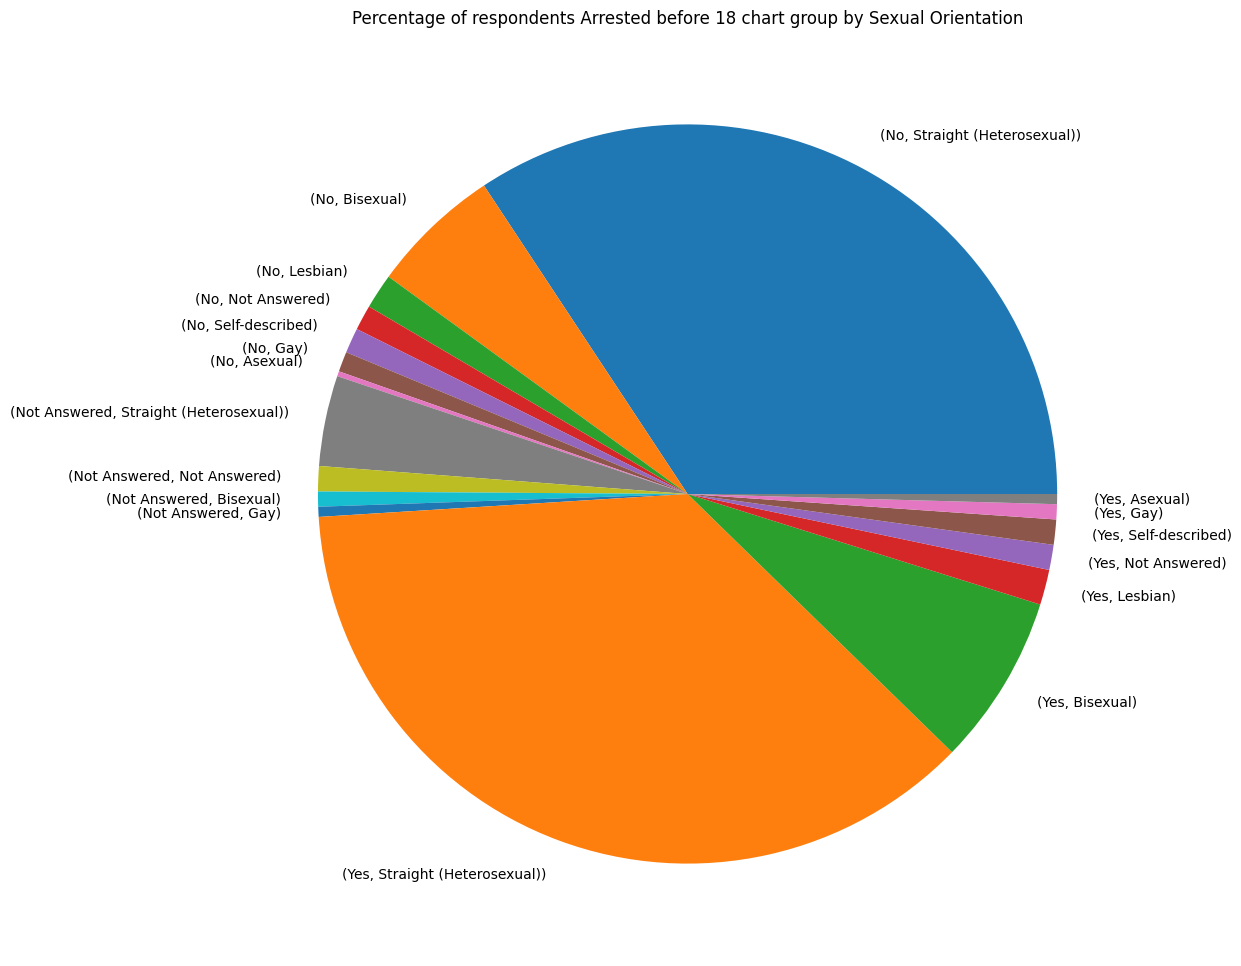

In [34]:
# Sexual Orientation from column 11
arrested_categorized_by_sex_orient = dataset.groupby("arrested_under18")["sexuality"].value_counts()

# Calculate the percentage
for (sexual_orient, number) in arrested_categorized_by_sex_orient["Yes"].iteritems():
    sexual_orient_percentage = (number / arrested_categorized_by_sex_orient.sum()) * 100
    answer = f"Percentage of {sexual_orient} answer YES to arrested before 18 is {sexual_orient_percentage} %"
    print(answer)

# Plot the bar chart for the total number responsdant
fig, ax = plt.subplots(figsize = (12,12))
arrested_categorized_by_sex_orient.plot(kind="pie")
plt.xticks(rotation=80)
plt.ylabel("")
plt.ylabel("")
plt.xlabel("")
plt.title("Percentage of respondents Arrested before 18 chart group by Sexual Orientation")

**Question 2** 

In [35]:
pd.set_option('display.max_columns', None)

# from cmath import nan
# clean data to obtain only cols needed to answer question 2
df_q2 = dataset[['race_ethnicity', 'gender', 'sexuality', 
                    'Elementary_School_Suspended', 'Middle_School_Suspended', 'High_School_Suspended', 
                    'Elementary_School_Expelled', 'Middle_School_Expelled', 'High_School_Expelled', 
                    'Elementary_School_Suspended_Where', 'Middle_School_Suspended_Where', 'High_School_Suspended_Where']]
is_suspended = ['Once', 'A few times', 'Often']
# filter respondents that have been either suspended or expelled
df_q2 = df_q2[(df_q2['Elementary_School_Suspended'].isin(is_suspended))
            | (df_q2['Middle_School_Suspended'].isin(is_suspended))
            | (df_q2['High_School_Suspended'].isin(is_suspended))
            | (df_q2['Elementary_School_Expelled']=='Yes') 
            | (df_q2['Middle_School_Expelled']=='Yes') 
            | (df_q2['High_School_Expelled']=='Yes')]

# filter suspended while in-school
df_q2 = df_q2[(df_q2['Elementary_School_Suspended_Where']=='In-school') 
            | (df_q2['Middle_School_Suspended_Where']=='In-school') 
            | (df_q2['High_School_Suspended_Where']=='In-school')]

df_q2.head()

,race_ethnicity,gender,sexuality,Elementary_School_Suspended,Middle_School_Suspended,High_School_Suspended,Elementary_School_Expelled,Middle_School_Expelled,High_School_Expelled,Elementary_School_Suspended_Where,Middle_School_Suspended_Where,High_School_Suspended_Where
63,Multi-Race,Male,Straight (Heterosexual),Never,Never,Once,No,No,Yes,Not Answered,Not Answered,In-school
64,White,Male,Straight (Heterosexual),Never,Once,A few times,No,No,No,In-school,Not Answered,"In-school, out-of-school"
70,Latinx,Male,Straight (Heterosexual),A few times,Often,Not Answered,No,Yes,Not Answered,Not Answered,In-school,Not Answered
73,Black/African American,Male,Straight (Heterosexual),Never,A few times,A few times,No,No,Yes,In-school,In-school,Out-of-school
74,Self-described,Male,Straight (Heterosexual),Never,Once,Often,No,No,No,In-school,Out-of-school,Out-of-school


Gender

For respondents either suspended or expelled in-school:
     70.0% are Male
     28.000000000000004% are Female
     1.0% are Self-described
     1.0% are Not Answered


Text(0.5, 1.0, 'Experienced School Discipline by Gender')

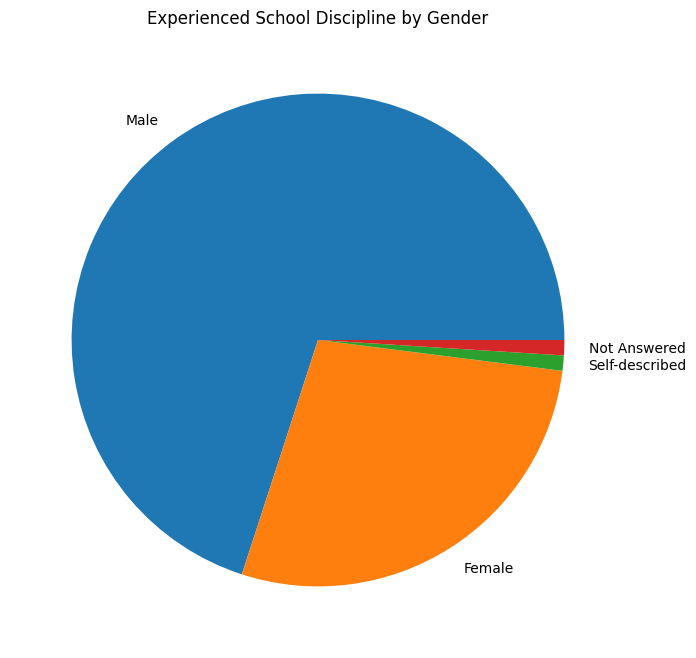

In [36]:
# clean gender data
print("For respondents either suspended or expelled in-school:")
for (gender, number) in df_q2['gender'].value_counts().iteritems():
    gender_percentage = (number / len(df_q2)) * 100
    answer = f"     {gender_percentage}% are {gender}"
    print(answer)

fig, ax = plt.subplots(figsize = (8,8))
fig.set_facecolor('white')
df_q2['gender'].value_counts().plot(kind="pie")
plt.xlabel("gender")
plt.ylabel("")
plt.xlabel("")
plt.title("Experienced School Discipline by Gender")

Race

For respondents either suspended or expelled in-school:
     34.0% are Black/African American
     32.0% are White
     12.0% are Latinx
     11.0% are Multi-Race
     8.0% are Self-described
     2.0% are Not Answered
     1.0% are Native American


Text(0.5, 1.0, 'Experienced School Discipline by Race')

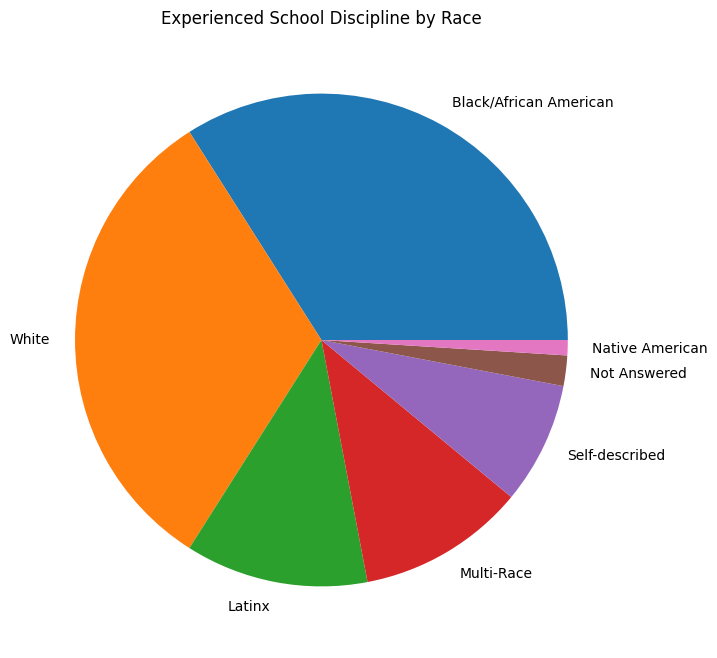

In [37]:
# # clean race data
print("For respondents either suspended or expelled in-school:")
for (race, number) in df_q2['race_ethnicity'].value_counts().iteritems():
    race_percentage = (number / len(df_q2)) * 100
    answer = f"     {race_percentage}% are {race}"
    print(answer)

fig, ax = plt.subplots(figsize = (8,8))
fig.set_facecolor('white')
df_q2['race_ethnicity'].value_counts().plot(kind="pie")
plt.xlabel("race")
plt.ylabel("")
plt.xlabel("")
plt.title("Experienced School Discipline by Race")

Sexual Orientation

For respondents either suspended or expelled in-school:
     83.0% are Straight (Heterosexual)
     9.0% are Bisexual
     3.0% are Lesbian
     2.0% are Not Answered
     1.0% are Gay
     1.0% are Self-described
     1.0% are Asexual


Text(0.5, 1.0, 'Experienced School Discipline by Gender')

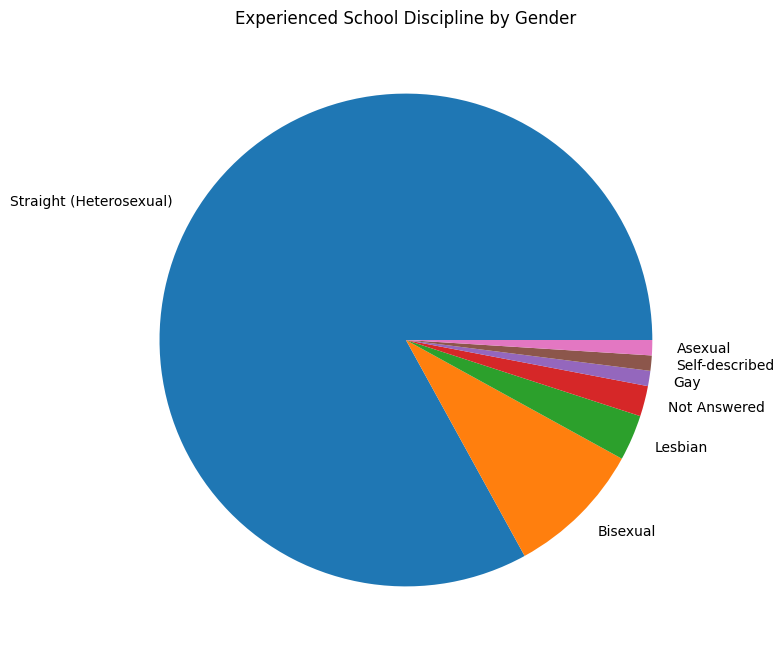

In [38]:
print("For respondents either suspended or expelled in-school:")
for (sex, number) in df_q2['sexuality'].value_counts().iteritems():
    sex_percentage = (number / len(df_q2)) * 100
    answer = f"     {sex_percentage}% are {sex}"
    print(answer)

fig, ax = plt.subplots(figsize = (8,8))
fig.set_facecolor('white')
df_q2['sexuality'].value_counts().plot(kind="pie")
plt.xlabel("sexuality")
plt.ylabel("")
plt.xlabel("")
plt.title("Experienced School Discipline by Sexual Orientation")

**Question 3**

Percentage of repsondents on IEP: 31.868131868131865%
Percentage of repsondents not on IEP: 58.901098901098905%


Text(0.5, 1.0, 'Number of respondants on IEP')

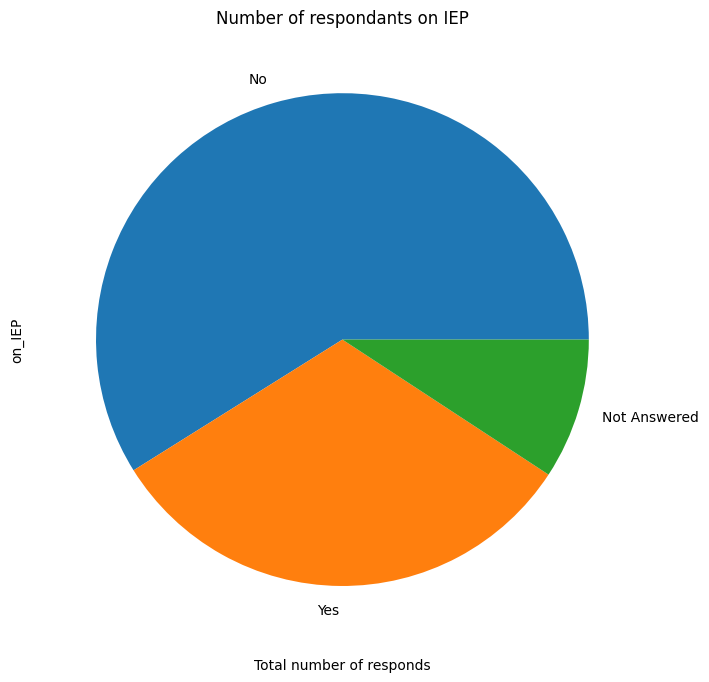

In [39]:
individual_IEP = dataset["on_IEP"].value_counts()

# Calculate the percentage of individuals on IEP
yes_percentage = individual_IEP["Yes"] / individual_IEP.sum() * 100 
np_percentage = individual_IEP["No"] / individual_IEP.sum() * 100 


print(f"Percentage of repsondents on IEP: {yes_percentage}%")
print(f"Percentage of repsondents not on IEP: {np_percentage}%")

fig, ax = plt.subplots(figsize = (8,8))
individual_IEP.plot(kind="pie")
plt.xlabel("Total number of responds")
plt.title("Number of respondants on IEP")

**Question 4**

What percentage of survey respondents experienced a home removal, separated by race, gender, and sexual orientation?

Race

Percentage of White home removal is 9.670329670329672 %
Percentage of Black/African American home removal is 5.274725274725275 %
Percentage of Multi-Race home removal is 5.274725274725275 %
Percentage of Latinx home removal is 2.6373626373626373 %
Percentage of Self-described home removal is 2.197802197802198 %
Percentage of Native American home removal is 0.8791208791208791 %
Percentage of Not Answered home removal is 0.8791208791208791 %
Percentage of Asian home removal is 0.21978021978021978 %


Text(0.5, 1.0, 'Home Removal by Race Ethinicity')

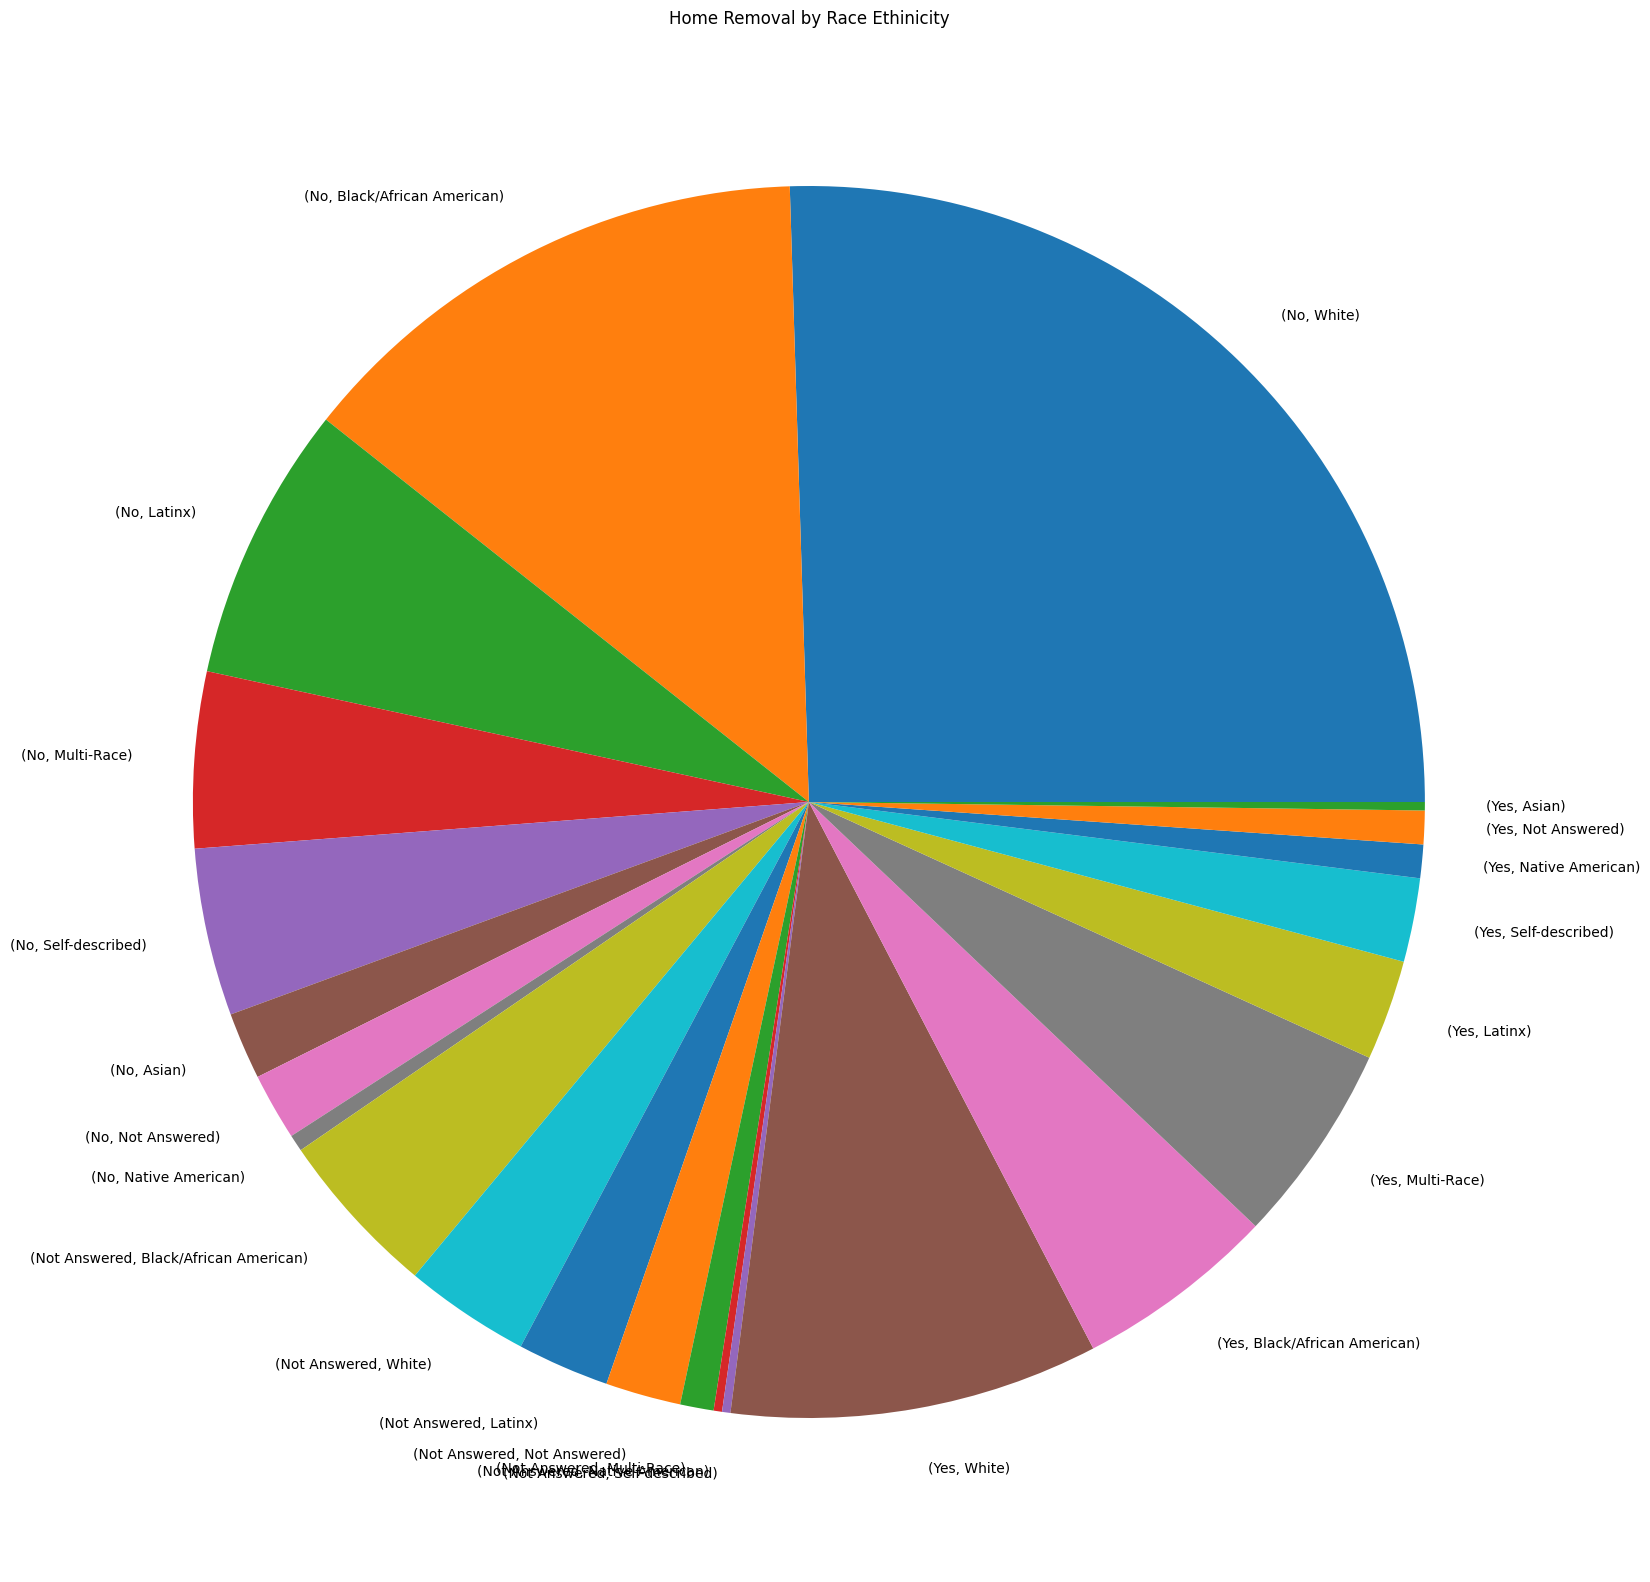

In [40]:
home_removal = dataset.groupby("removed_from_home")["race_ethnicity"].value_counts()
# print(home_removal)
# print()

# Calculate the percentage
for (gender, number) in home_removal["Yes"].iteritems():
    gender_percentage = (number / home_removal.sum()) * 100
    answer = f"Percentage of {gender} home removal is {gender_percentage} %"
    print(answer)

# Plot the bar chart for the total number responsdant
fig, ax = plt.subplots(figsize = (20,20))
home_removal.plot(kind="pie")
plt.xlabel("Total number of responds")
plt.xticks(rotation=80)
plt.ylabel("")
plt.xlabel("")
plt.title("Home Removal by Race Ethinicity")

Gender

Percentage of Male answer YES to home removal is 13.626373626373626 %
Percentage of Female answer YES to home removal is 12.527472527472527 %
Percentage of Not Answered answer YES to home removal is 0.43956043956043955 %
Percentage of Self-described answer YES to home removal is 0.43956043956043955 %


Text(0.5, 1.0, 'Home Removal by gender')

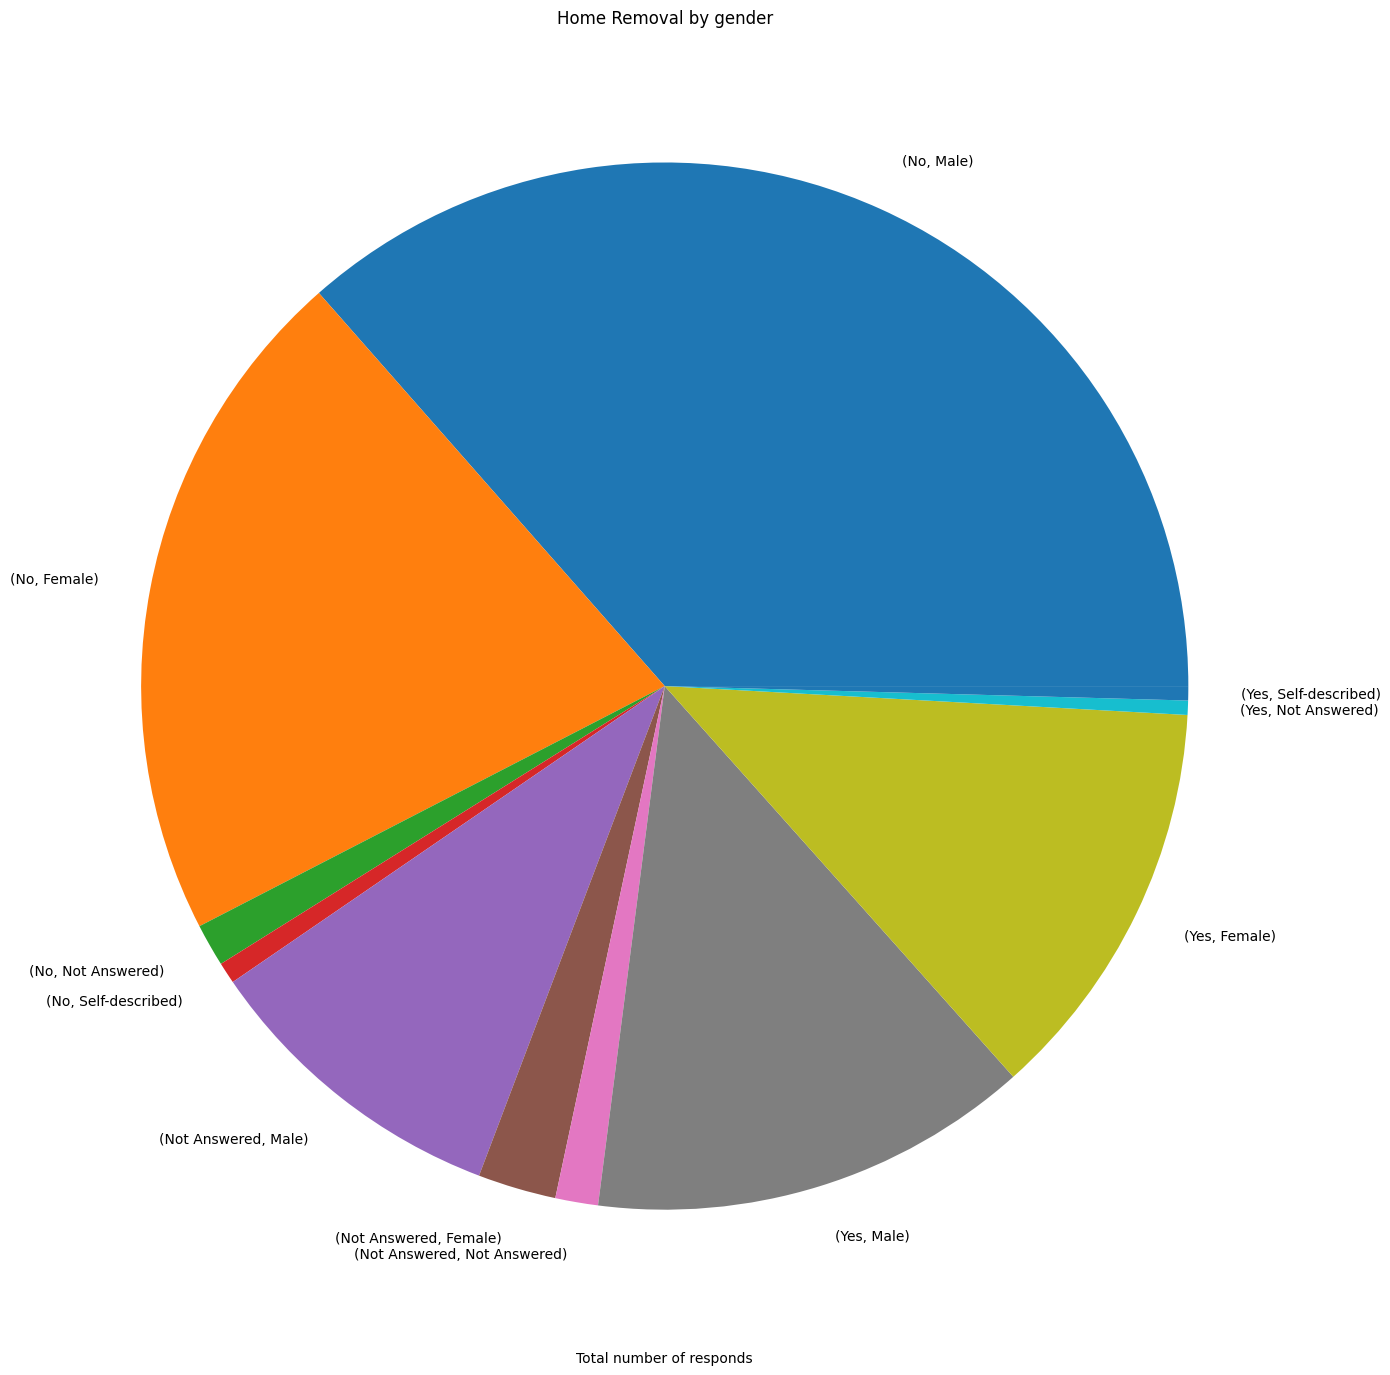

In [41]:
home_removal = dataset.groupby("removed_from_home")["gender"].value_counts()

# Calculate the percentage
for (gender, number) in home_removal["Yes"].iteritems():
    gender_percentage = (number / home_removal.sum()) * 100
    answer = f"Percentage of {gender} answer YES to home removal is {gender_percentage} %"
    print(answer)

# Plot the bar chart for the total number responsdant
fig, ax = plt.subplots(figsize = (17,17))
home_removal.plot(kind="pie")
plt.xlabel("Total number of responds")
plt.xticks(rotation=80)
plt.ylabel("")
plt.title("Home Removal by gender")

Sexual Orientation

Percentage of Straight (Heterosexual) answer Yes to home removal is 19.12087912087912 %
Percentage of Bisexual answer Yes to home removal is 4.835164835164836 %
Percentage of Lesbian answer Yes to home removal is 1.3186813186813187 %
Percentage of Self-described answer Yes to home removal is 0.8791208791208791 %
Percentage of Gay answer Yes to home removal is 0.43956043956043955 %
Percentage of Not Answered answer Yes to home removal is 0.43956043956043955 %


Text(0.5, 1.0, 'Home Removal by sexuality')

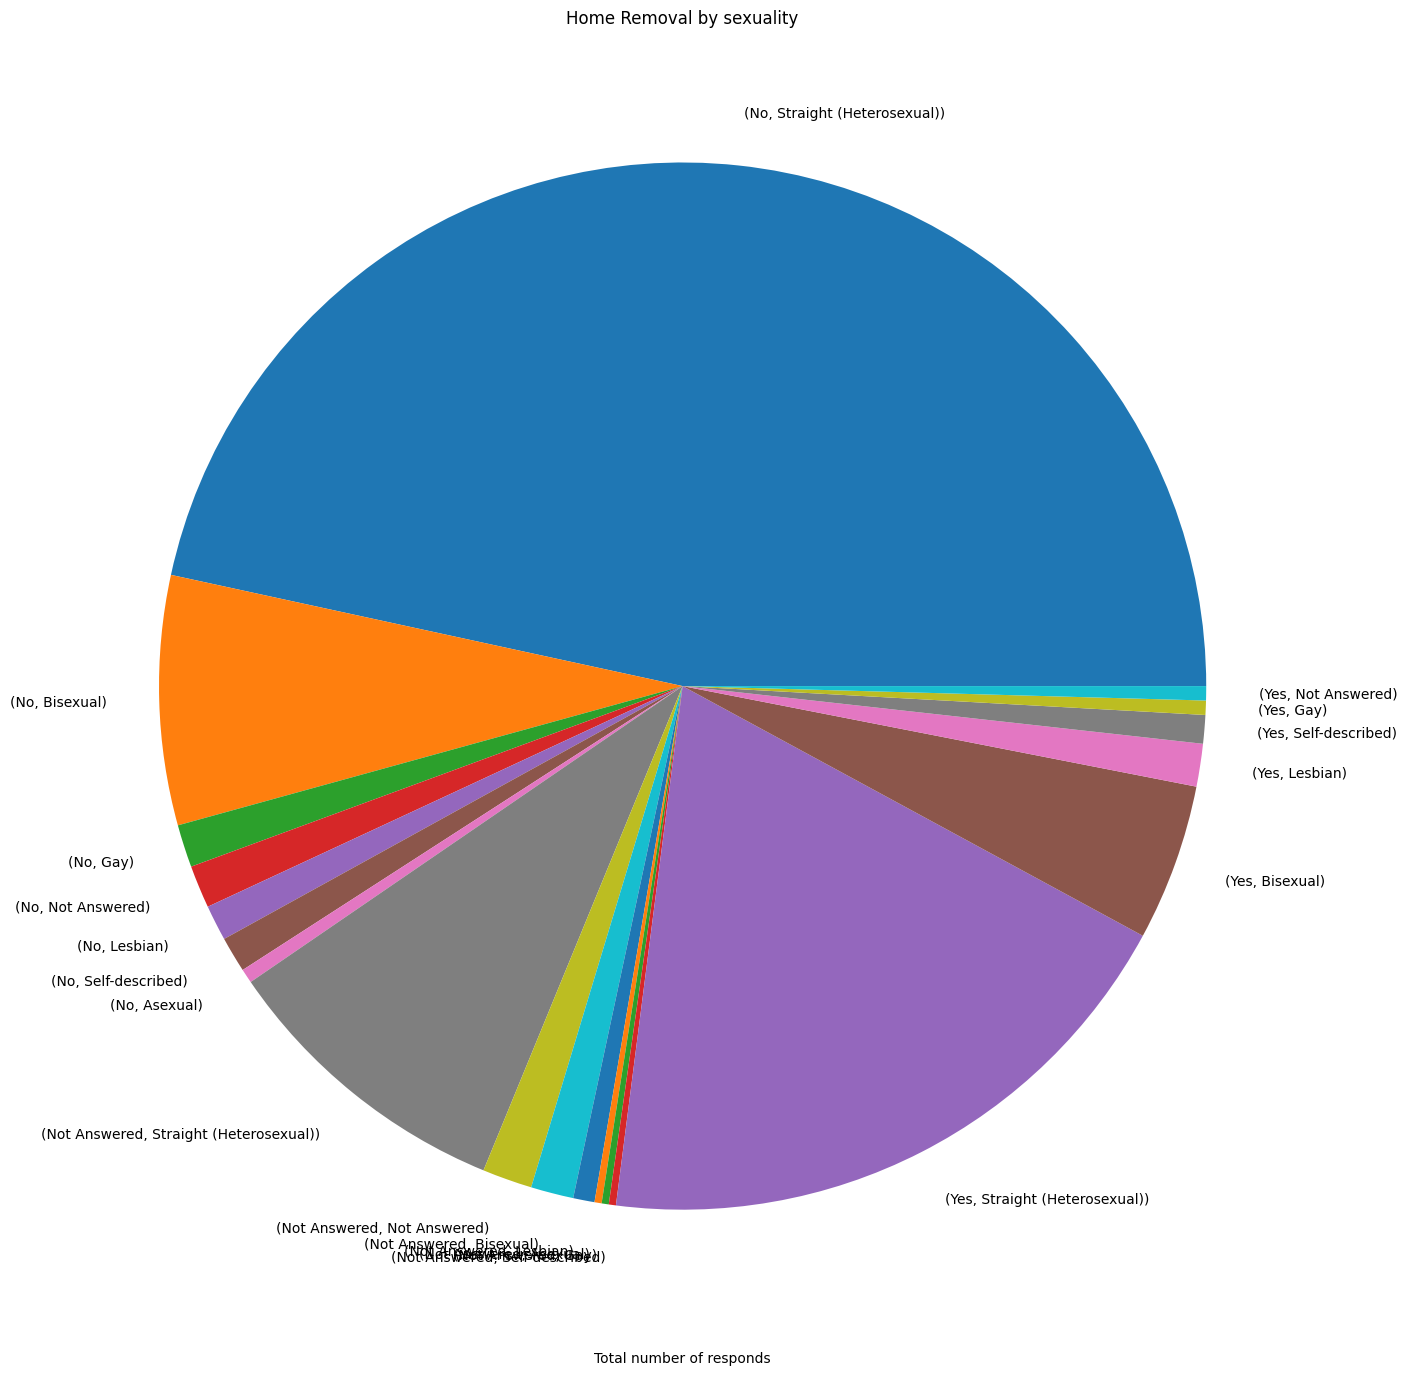

In [47]:
home_removal = dataset.groupby("removed_from_home")["sexuality"].value_counts()

# Calculate the percentage
for (gender, number) in home_removal["Yes"].iteritems():
    gender_percentage = (number / home_removal.sum()) * 100
    answer = f"Percentage of {gender} answer Yes to home removal is {gender_percentage} %"
    print(answer)

# Plot the bar chart for the total number responsdant
fig, ax = plt.subplots(figsize = (17,17))
home_removal.plot(kind="pie")
plt.xlabel("Total number of responds")
plt.xticks(rotation=80)
plt.ylabel("")
plt.title("Home Removal by sexuality")

**Question 5** 

Which factors along the pipeline are most predictive of a respondent experiencing incarceration (i.e. arrests before age 18, removal from home, suspension/expulsion, etc.)?

**Question 6**

In [43]:
# Process the zipcode 

for val in dataset["zipcode"]:
    if val in ["Not Answered", "Not answered"]:
        dataset["zipcode"].replace(val, 0, True)

dataset["zipcode"] = dataset["zipcode"].astype(float).astype(int)
dataset["zipcode"] = dataset["zipcode"].astype(str)

for zip in dataset["zipcode"]:
    old_val = zip
    # Make length of postal code to 5 for look up 
    if len(zip) < 5:
        for i in range(0, 5-len(zip)):
            zip = "0" + zip
    
    dataset["zipcode"].replace(to_replace=old_val, 
                            value=zip, 
                            inplace=True)

dataset["zipcode"]

0      00000
1      03064
2      02130
3      02188
4      02150
       ...  
450    02121
451    70100
452    11206
453    01701
454    01843
Name: zipcode, Length: 455, dtype: object

In [44]:
nomi = pgeocode.Nominatim('us')

postal_code = nomi.query_postal_code(dataset['zipcode'].tolist())

# Get the latitude/longtitude from 
dataset["latitude"] = postal_code["latitude"]
dataset["longtitude"] = postal_code["longitude"]

# Save to map
map = folium.Map(location=[43,-102], zoom_start=4)

heat_df = dataset[["latitude", "longtitude", "age"]]
heat_df = heat_df.dropna(axis=0, subset=["latitude","longtitude"])

# Produce a Heat Map of repsondants
heat_data = [[row["latitude"],row["longtitude"]] for (index, row) in heat_df.iterrows()]
HeatMap(heat_data).add_to(map)

# Can open the map using command
# google-chrome index.html
map.save("index_full_dataset.html")

In [45]:
# zoom in version of massachusetts

In [1]:
!google-chrome index_full_dataset.html

Opening in existing browser session.
